# Data collection

In [2]:
#importing basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading data
df1=pd.read_csv('C:/Users/Aeloori Revanth Kuma/Documents/forage/Winequality.csv')
df1.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df1.shape

(6497, 13)

In [5]:
#converting categorical data into numeric
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
r=l.fit_transform(df1['type'])
df1.insert(0,column='types',value=r)


In [6]:
df1.drop(columns='type',inplace=True,axis=1)

In [7]:
df1.head()
df=df1.copy()

In [8]:
df.describe()

,types,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,0.753886,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,0.430779,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


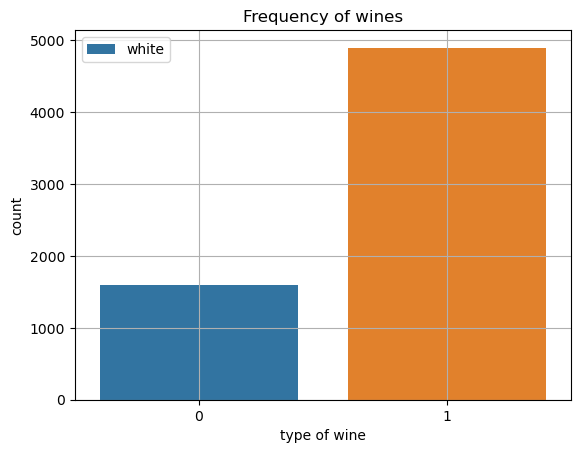

In [13]:
#frequency of types of wine
sns.countplot(x=df['types'])
plt.title('Frequency of wines')
plt.xlabel('type of wine')
plt.legend(['white'])
plt.grid()

Text(0.5, 1.0, 'Percentage of type of wine')

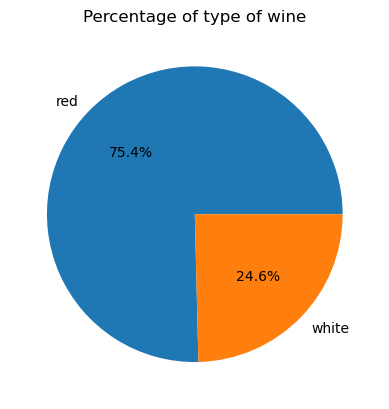

In [14]:
fig,ax=plt.subplots()
ax.pie(x=df['types'].value_counts(),labels=['red','white'],autopct='%1.1f%%')
plt.title('Percentage of type of wine')

In [15]:
#relation between target variable ie qualtiy and remaining attributes are shown in below 3 cells

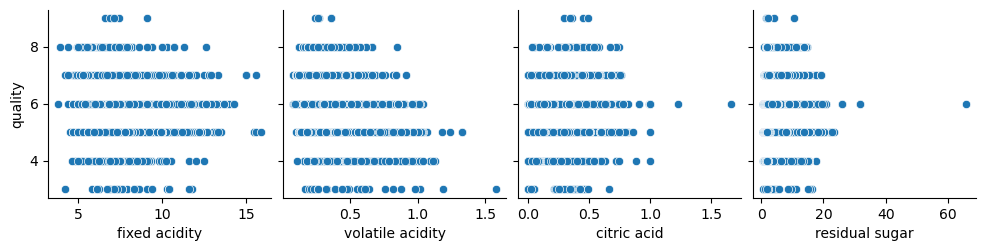

In [10]:
sns.pairplot(data=df,x_vars=df.columns[1:5],y_vars='quality',height=2.5)

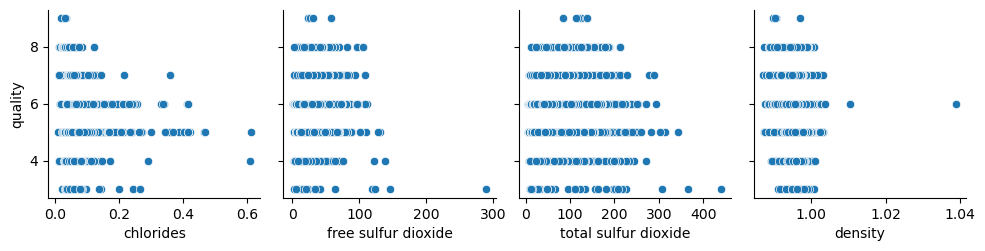

In [11]:
sns.pairplot(data=df,x_vars=df.columns[5:9],y_vars='quality',height=2.5)

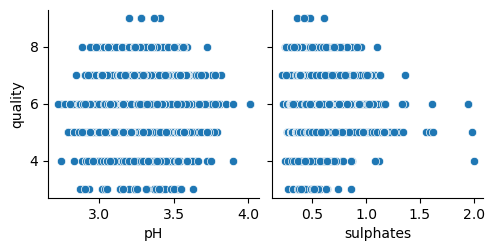

In [12]:
sns.pairplot(data=df,x_vars=df.columns[9:11],y_vars='quality',height=2.5)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

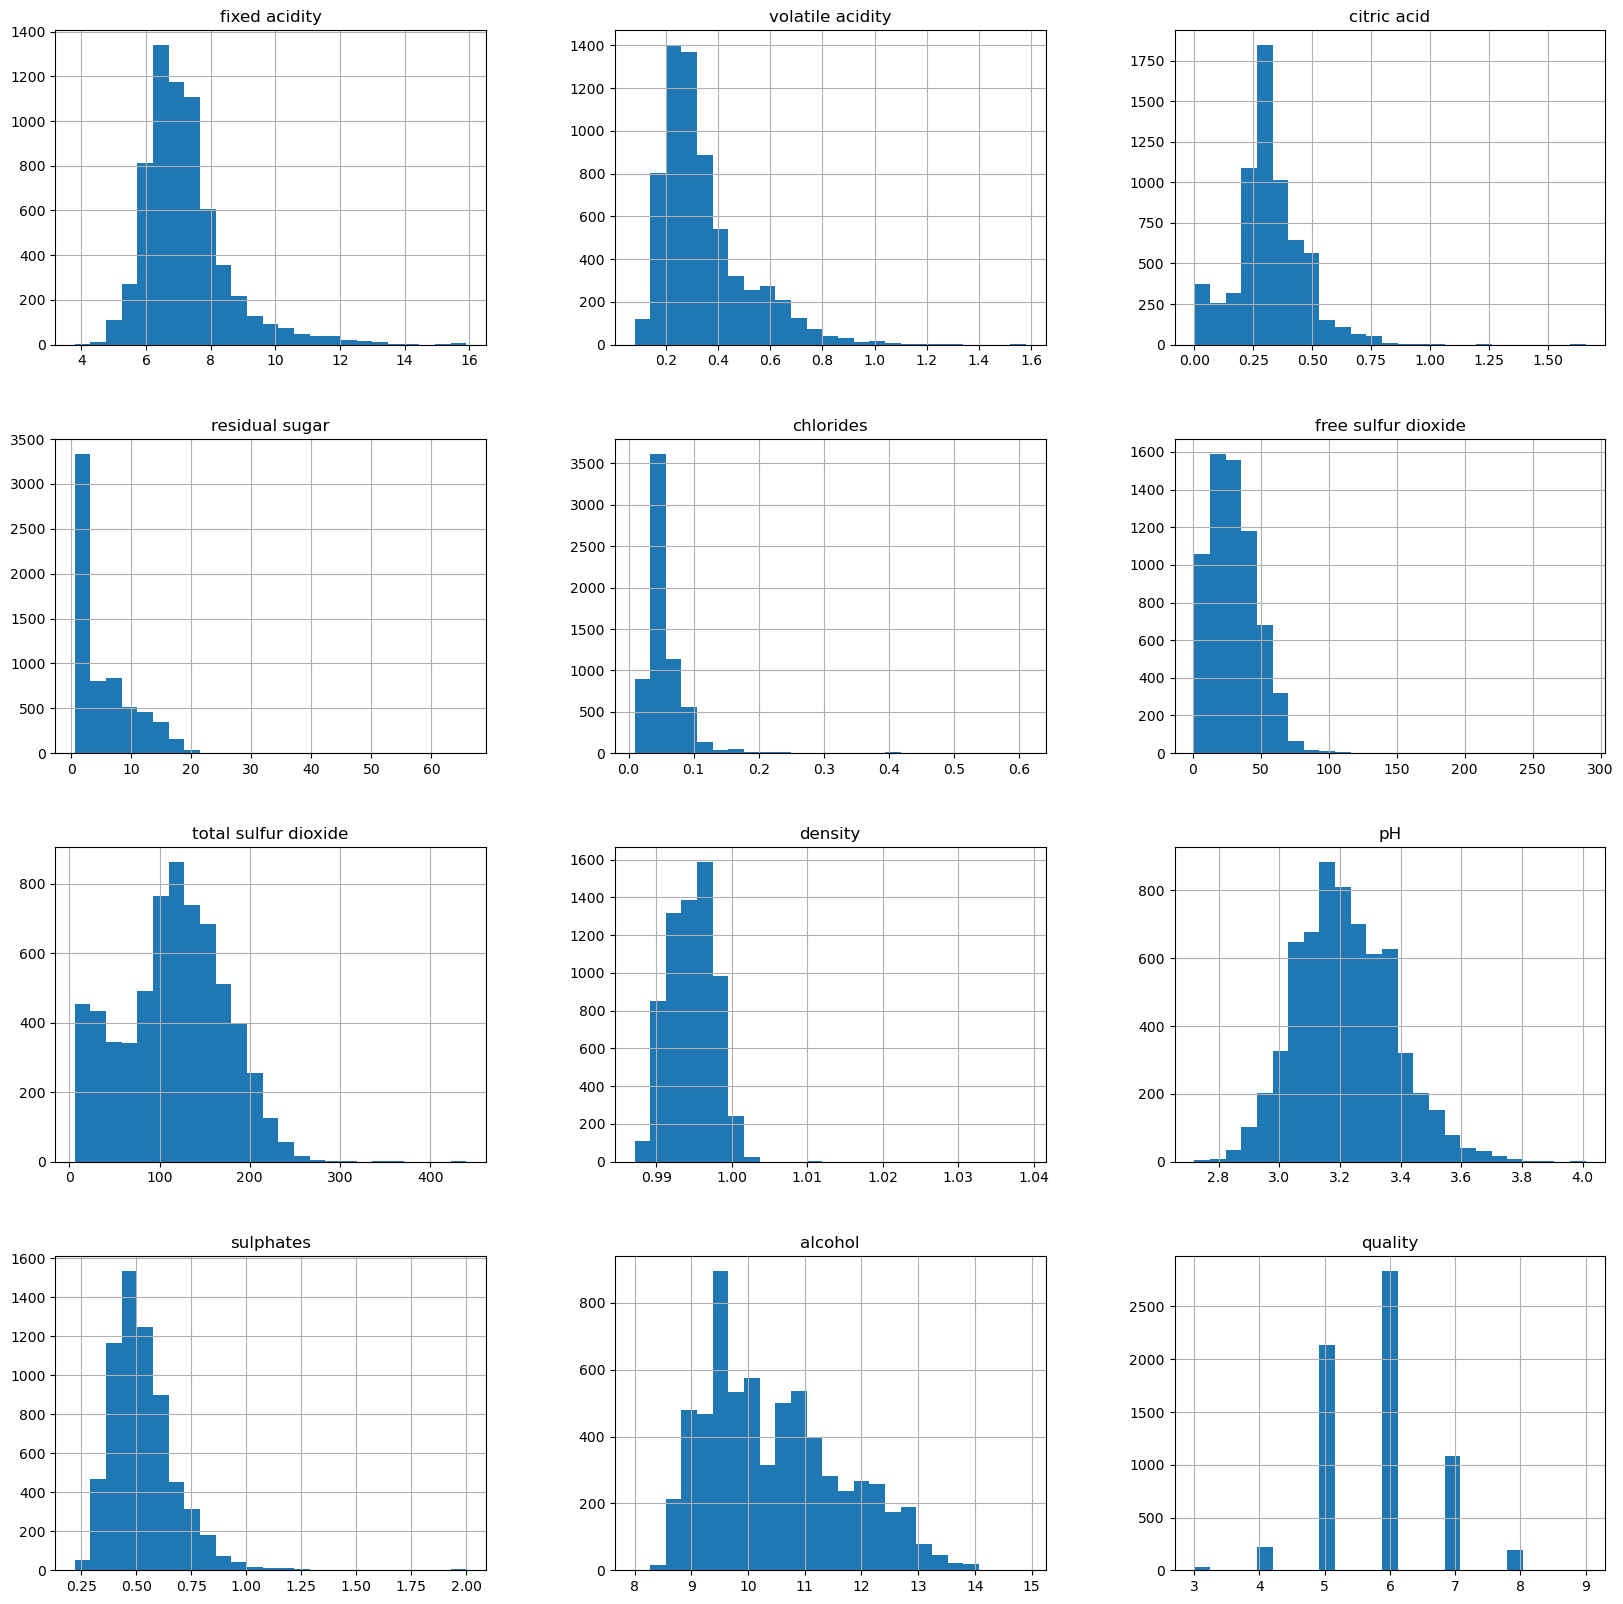

In [13]:
#histograms of all attributes
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])
numerical_attributes.hist(bins=25, figsize=[20, 20])

# Data Preprocessing

In [188]:
#checking null values
df.isna().sum()

types                    0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
#filling the null values with either mean or median of the columns

In [189]:
df['fixed acidity'].fillna(df['fixed acidity'].median(),inplace=True)

In [190]:
df['citric acid'].fillna(df['citric acid'].mean(),inplace=True)

In [191]:
df['residual sugar'].fillna(df['residual sugar'].mean(),inplace=True)

In [192]:
df['volatile acidity'].fillna(df['volatile acidity'].median(),inplace=True)

In [193]:
df['chlorides'].fillna(df['chlorides'].mean(),inplace=True)

In [194]:
df['pH'].fillna(df['pH'].mean(),inplace=True)

In [195]:
df['sulphates'].fillna(df['sulphates'].median(),inplace=True)

In [196]:
df.head()

,types,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [197]:
df.isna().sum()

types                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

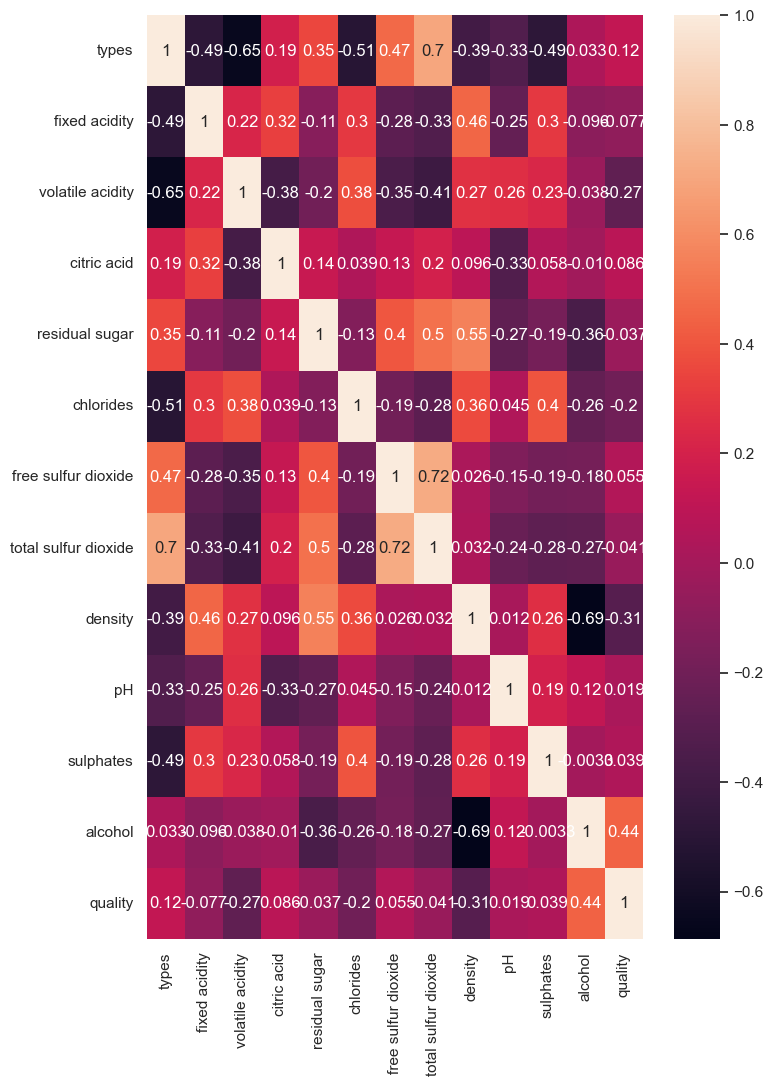

In [198]:
#corelation of attributes with quality is shown
sns.heatmap(df.corr(),annot=True)
sns.set(rc = {'figure.figsize':(8, 12)})

In [199]:
df.corr()['quality']

types                   0.119323
fixed acidity          -0.076931
volatile acidity       -0.265901
citric acid             0.085699
residual sugar         -0.036819
chlorides              -0.200818
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019356
sulphates               0.038770
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

In [200]:
cols=df.columns

In [215]:
#Data scaling into range 0 and 1
from sklearn.preprocessing import MinMaxScaler
df=MinMaxScaler(feature_range=(0,1)).fit_transform(df)
obj=MinMaxScaler().fit(df)

In [202]:
df=pd.DataFrame(df,columns=cols)

In [203]:
df.head()
#df['quality'].unique()

,types,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,0.5
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,0.5
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,0.5
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.5
4,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.5


In [204]:
data=df.copy()

# Building and Evaluating Machine Learning Model 

In [205]:
from sklearn.model_selection import train_test_split
#x=data.drop(columns=['fixed acidity','citric acid','residual sugar','free sulfur dioxide','total sulfur dioxide','pH','sulphates','quality'])
x=data.drop(columns=['quality'],axis=1)
y=data[['quality']]

In [206]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)


In [207]:
#importing algorithm
from sklearn.linear_model import LinearRegression

In [208]:
#building model with algorithm and train data
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [209]:
#predicted quality of test data
ypr=lr.predict(xtest)
ypred=pd.DataFrame(ypr,columns=['quality'])
ypred


,quality
0,0.558304
1,0.503863
2,0.461363
3,0.410579
4,0.455264
...,...
1295,0.526323
1296,0.454502
1297,0.430462
1298,0.447622


In [210]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean square error:",mean_squared_error(ytest,ypred))
print("R square:",r2_score(ytest,ypred))

Mean square error: 0.013087060674579837
R square: 0.340886157955981


In [240]:
#transforming scaled values to the original scale
obj=MinMaxScaler(feature_range=(0,1)).fit(df1[['quality']])
actual_pred = scalerinverse(df1).inverse_transform(ypred)
print("Predicted values of test set:",actual_pred[:,0])
print("Actual values of test set:",obj.inverse_transform(ytest))

Predicted values of test set: [6.34982245 6.02317763 5.76817708 ... 5.58277101 5.68573062 5.43731445]
Actual values of test set: [[7.]
 [7.]
 [6.]
 ...
 [6.]
 [6.]
 [6.]]


In [242]:
#prompt for providing data that needs to be predicted
dic={}
print("Enter {0} of the wine: (type '0' for white and '1' for red)".format(cols[0]))
dic[cols[0]]=float(input())
for i in range(1,12):
    print("Enter {0}:".format(cols[i]))
    dic[cols[i]]=float(input())
print(dic)
res=pd.DataFrame(dic,index=[0]) 
res=MinMaxScaler(feature_range=(0,1)).fit_transform(res)
pred_val=lr.predict(res)
pred_val=pd.DataFrame(pred_val,columns=['predicted quality'])
type(pred_val)
print("Predicted quality:",obj.inverse_transform(pred_val))   

Enter types of the wine: (type '0' for white and '1' for red)
1
Enter fixed acidity:
1
Enter volatile acidity:
1
Enter citric acid:
1
Enter residual sugar:
1
Enter chlorides:
1
Enter free sulfur dioxide:
1
Enter total sulfur dioxide:
1
Enter density:
1
Enter pH:
1
Enter sulphates:
1
Enter alcohol:
1
{'types': 1.0, 'fixed acidity': 1.0, 'volatile acidity': 1.0, 'citric acid': 1.0, 'residual sugar': 1.0, 'chlorides': 1.0, 'free sulfur dioxide': 1.0, 'total sulfur dioxide': 1.0, 'density': 1.0, 'pH': 1.0, 'sulphates': 1.0, 'alcohol': 1.0}
Predicted quality: [[5.67301824]]


C:\Users\Aeloori Revanth Kuma\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 